In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from random import choice

In [2]:
# Define the Encoder
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        return x

# Define the Decoder
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.conv_trans1 = nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=0)
        self.conv_trans2 = nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.conv_trans3 = nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1)

    def forward(self, x):
        x = torch.relu(self.conv_trans1(x))
        x = torch.relu(self.conv_trans2(x))
        x = torch.sigmoid(self.conv_trans3(x))  # Use sigmoid for pixel intensity between [0, 1]
        return x

# Create Autoencoder (Encoder + Decoder)
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [3]:
# Instantiate the model
autoencoder = Autoencoder()

# Pattern Generators (same as before)
def generate_concentric_circles(size=28):
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    x, y = np.meshgrid(x, y)
    z = np.sin(5 * (x**2 + y**2))
    return (z - z.min()) / (z.max() - z.min())

def generate_vertical_stripes(size=28):
    z = np.zeros((size, size))
    z[:, ::2] = 1  # Every second column is set to 1
    return z

def generate_horizontal_stripes(size=28):
    z = np.zeros((size, size))
    z[::2, :] = 1  # Every second row is set to 1
    return z

def generate_diagonal_lines(size=28):
    z = np.zeros((size, size))
    for i in range(size):
        z[i, i] = 1  # Create diagonal line
    return z

def generate_checkerboard(size=28):
    z = np.indices((size, size)).sum(axis=0) % 2
    return z

def generate_star_pattern(size=28):
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    x, y = np.meshgrid(x, y)
    z = np.sin(10 * np.arctan2(y, x))
    return (z - z.min()) / (z.max() - z.min())

def generate_spiral(size=28):
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    x, y = np.meshgrid(x, y)
    z = np.sin(np.sqrt(x**2 + y**2) * 6)
    return (z - z.min()) / (z.max() - z.min())

def generate_noise_with_circle(size=28):
    z = np.random.rand(size, size)
    circle_mask = (np.sqrt(np.linspace(-1, 1, size)[:, None]**2
                           + np.linspace(-1, 1, size)[None, :]**2) <= 0.5)
    z[circle_mask] = 1  # Set circle region to 1
    return z

def generate_diamond(size=28):
    z = np.zeros((size, size))
    center = size // 2
    for i in range(size):
        for j in range(size):
            if abs(i - center) + abs(j - center) <= center:
                z[i, j] = 1
    return z

def generate_grid_of_dots(size=28):
    z = np.zeros((size, size))
    z[::4, ::4] = 1  # Place dots every 4th row and column
    return z

# Create a dictionary of patterns
pattern_generators = {
    "Concentric Circles": generate_concentric_circles,
    "Vertical Stripes": generate_vertical_stripes,
    "Horizontal Stripes": generate_horizontal_stripes,
    "Diagonal Lines": generate_diagonal_lines,
    "Checkerboard": generate_checkerboard,
    "Star Pattern": generate_star_pattern,
    "Spiral": generate_spiral,
    "Noise with Circle": generate_noise_with_circle,
    "Diamond": generate_diamond,
    "Grid of Dots": generate_grid_of_dots
}

# Training Loop
def generate_random_pattern_batch(batch_size):
    patterns = []
    for _ in range(batch_size):
        generator = choice(list(pattern_generators.values()))
        pattern = generator(28)
        patterns.append(pattern)
    return torch.tensor(np.array(patterns), dtype=torch.float32).unsqueeze(1)

In [4]:
# Loss function and optimizer
criterion = nn.MSELoss()  # Reconstruction error
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

epochs = 20
batch_size = 16
for epoch in range(epochs):
    autoencoder.train()
    for _ in range(100):
        # Generate random batch of patterns
        batch = generate_random_pattern_batch(batch_size)

        # Forward pass
        outputs = autoencoder(batch)
        loss = criterion(outputs, batch)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/20], Loss: 0.0802
Epoch [2/20], Loss: 0.0401
Epoch [3/20], Loss: 0.0081
Epoch [4/20], Loss: 0.0125
Epoch [5/20], Loss: 0.0126
Epoch [6/20], Loss: 0.0045
Epoch [7/20], Loss: 0.0059
Epoch [8/20], Loss: 0.0032
Epoch [9/20], Loss: 0.0179
Epoch [10/20], Loss: 0.0102
Epoch [11/20], Loss: 0.0017
Epoch [12/20], Loss: 0.0044
Epoch [13/20], Loss: 0.0084
Epoch [14/20], Loss: 0.0007
Epoch [15/20], Loss: 0.0117
Epoch [16/20], Loss: 0.0047
Epoch [17/20], Loss: 0.0006
Epoch [18/20], Loss: 0.0078
Epoch [19/20], Loss: 0.0011
Epoch [20/20], Loss: 0.0004


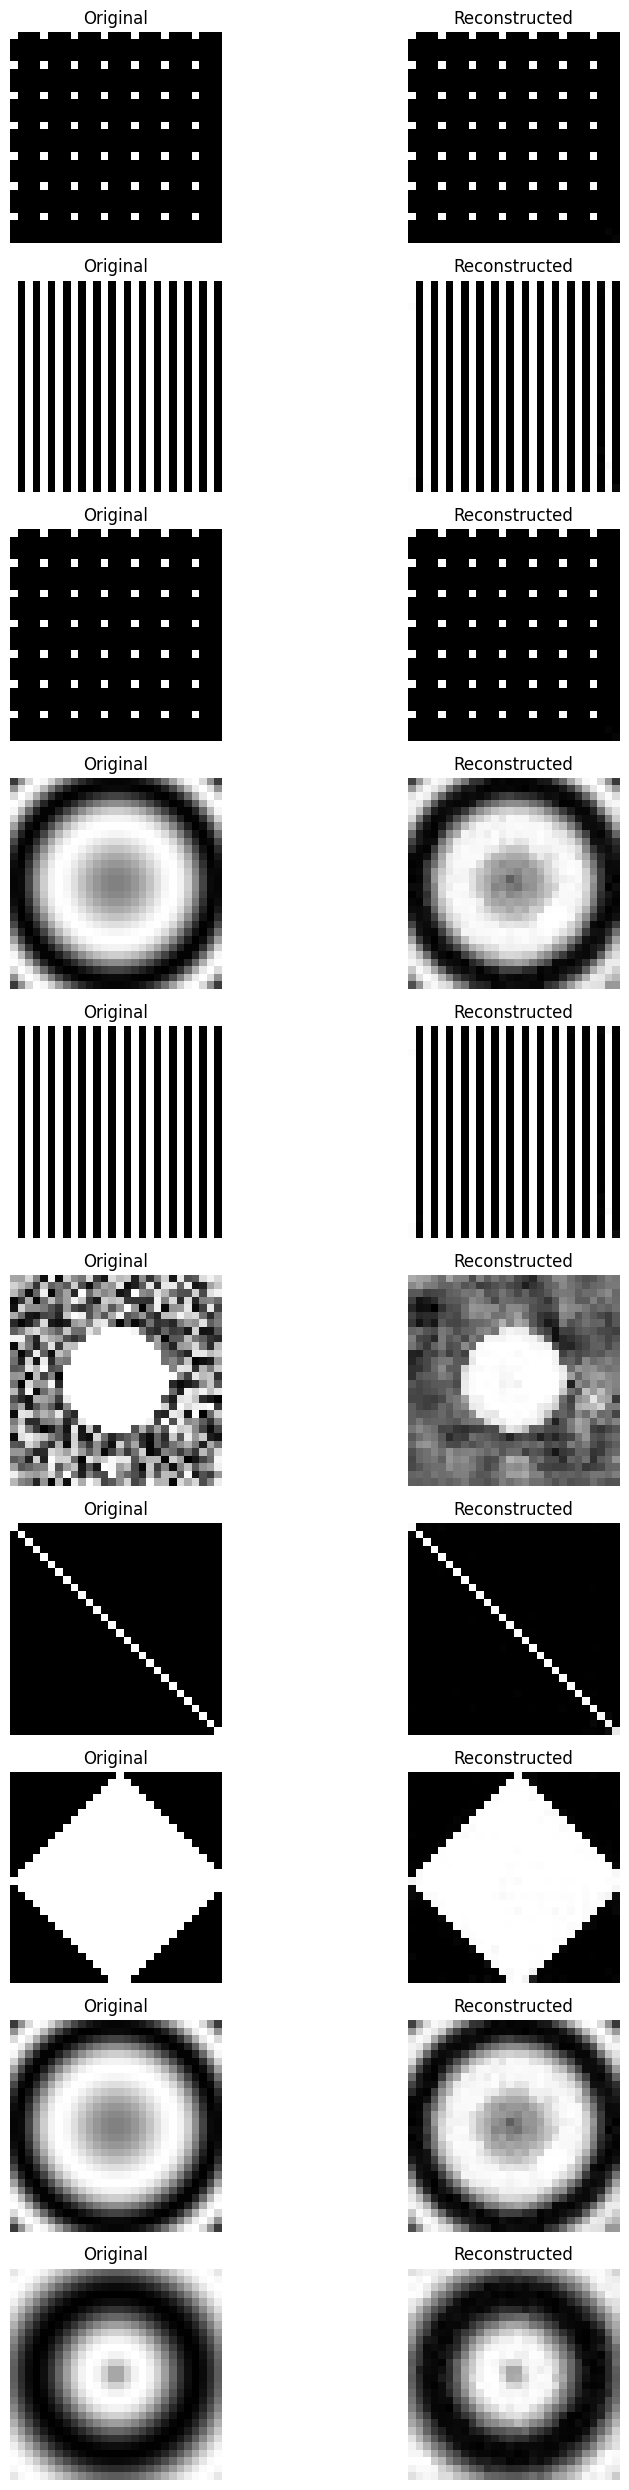

In [5]:
# Visualize 10 random examples of input and reconstructed images
def visualize_reconstructions(autoencoder, pattern_generators):
    autoencoder.eval()
    with torch.no_grad():
        fig, axes = plt.subplots(10, 2, figsize=(10, 25))
        for i in range(10):
            generator = choice(list(pattern_generators.values()))
            pattern_image = generator(28)
            input_tensor = torch.tensor(pattern_image,
                        dtype=torch.float32).unsqueeze(0).unsqueeze(0)

            # Get reconstruction
            reconstructed = autoencoder(input_tensor)

            # Display input and reconstructed images
            axes[i, 0].imshow(pattern_image, cmap='gray')
            axes[i, 0].set_title("Original")
            axes[i, 0].axis('off')

            axes[i, 1].imshow(reconstructed[0, 0].numpy(), cmap='gray')
            axes[i, 1].set_title("Reconstructed")
            axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Show 10 examples of reconstruction
visualize_reconstructions(autoencoder, pattern_generators)

In [6]:
# Define the Encoder for VAE
class EncoderVAE(nn.Module):
    def __init__(self, latent_dim=2):
        super(EncoderVAE, self).__init__()
        self.conv1 = nn.Conv2d(1,  16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)

        # Fully connected layers for mean and variance
        self.fc_mu = nn.Linear(64*4*4, latent_dim)
        self.fc_logvar = nn.Linear(64*4*4, latent_dim)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = x.view(x.size(0), -1)  # Flatten
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

# Reparameterization trick to sample from the latent space
def reparameterize(mu, logvar):
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std)
    return mu + eps * std

# Define the Decoder for VAE
class DecoderVAE(nn.Module):
    def __init__(self, latent_dim=2):
        super(DecoderVAE, self).__init__()
        self.fc = nn.Linear(latent_dim, 64*4*4)

        self.conv_trans1 = nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=0)
        self.conv_trans2 = nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.conv_trans3 = nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1)

    def forward(self, z):
        x = torch.relu(self.fc(z)).view(-1, 64, 4, 4)
        x = torch.relu(self.conv_trans1(x))
        x = torch.relu(self.conv_trans2(x))
        x = torch.sigmoid(self.conv_trans3(x))  # Output between [0, 1]
        return x

# Variational Autoencoder (VAE) Model
class VAE(nn.Module):
    def __init__(self, latent_dim=2):
        super(VAE, self).__init__()
        self.encoder = EncoderVAE(latent_dim)
        self.decoder = DecoderVAE(latent_dim)

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = reparameterize(mu, logvar)
        reconstructed = self.decoder(z)
        return reconstructed, mu, logvar

# Loss function: Reconstruction + KL divergence
def vae_loss_function(reconstructed, original, mu, logvar):
    recon_loss = nn.functional.mse_loss(reconstructed, original, reduction='sum')
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_loss

In [7]:
# Training loop with minimal output
epochs = 20
batch_size = 16

# Instantiate the VAE and optimizer
latent_dim = 2
vae = VAE(latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=0.001)

for epoch in range(epochs):
    vae.train()
    for _ in range(100):  # Simulate batches
        batch = generate_random_pattern_batch(batch_size)

        # Forward pass
        reconstructed, mu, logvar = vae(batch)
        loss = vae_loss_function(reconstructed, batch, mu, logvar)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print loss every 5 epochs
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [5/20], Loss: 494.5244
Epoch [10/20], Loss: 335.0147
Epoch [15/20], Loss: 194.8927
Epoch [20/20], Loss: 195.2404


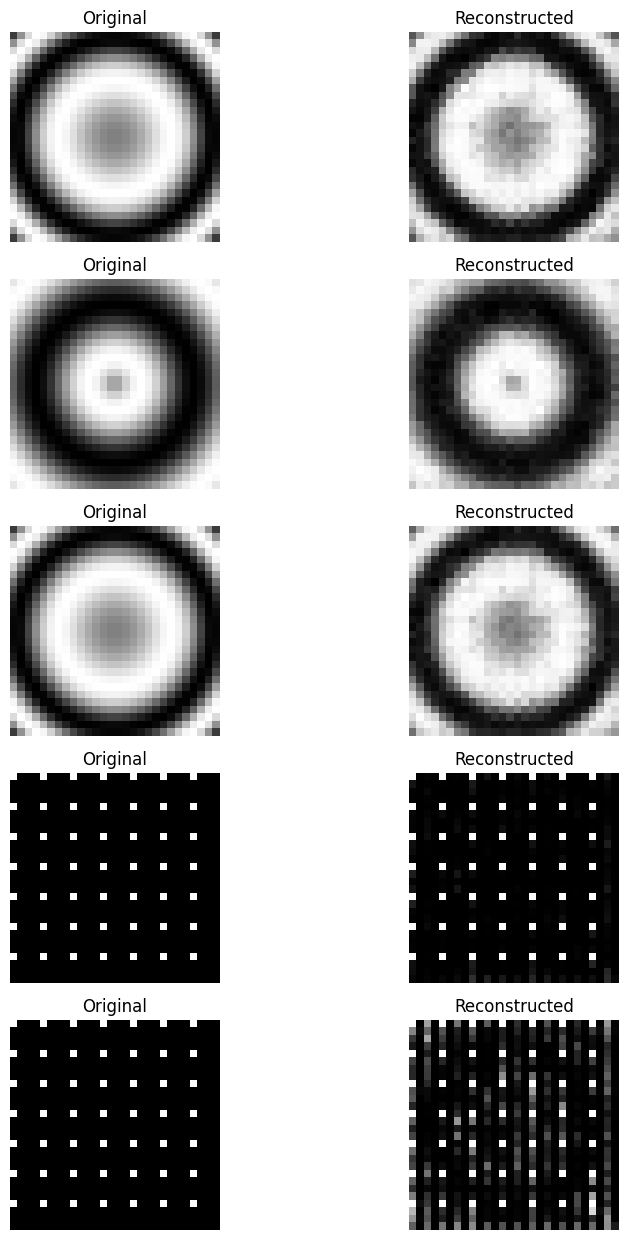

In [8]:
# Visualize input and reconstructed images in one row each
def visualize_reconstructions(vae, pattern_generators, num_examples=10):
    vae.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        fig, axes = plt.subplots(num_examples, 2, figsize=(10, num_examples * 2.5))

        for i in range(num_examples):
            # Randomly select a pattern generator
            generator = choice(list(pattern_generators.values()))
            pattern_image = generator(28)
            input_tensor = torch.tensor(pattern_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

            # Get the reconstruction from the VAE
            reconstructed, _, _ = vae(input_tensor)

            # Display original input
            axes[i, 0].imshow(pattern_image, cmap='gray')
            axes[i, 0].set_title("Original")
            axes[i, 0].axis('off')

            # Display reconstructed output
            axes[i, 1].imshow(reconstructed[0, 0].cpu().numpy(), cmap='gray')
            axes[i, 1].set_title("Reconstructed")
            axes[i, 1].axis('off')

        plt.tight_layout()
        plt.show()

# After training, visualize 10 examples
visualize_reconstructions(vae, pattern_generators, num_examples=5)

In [9]:
# Add noise to the input image
def add_noise_to_image(image, noise_factor=0.2):
    noisy_image = image + noise_factor * torch.randn_like(image)  # Add Gaussian noise
    noisy_image = torch.clamp(noisy_image, 0., 1.)  # Clip the values to keep them between 0 and 1
    return noisy_image

In [10]:
# Training loop for the Denoising VAE
epochs = 20
batch_size = 16
noise_factor = 0.2  # The amount of noise to add

# Instantiate the VAE and optimizer
latent_dim = 2
vae = VAE(latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=0.001)

for epoch in range(epochs):
    vae.train()
    for _ in range(100):  # Simulate batches
        batch = generate_random_pattern_batch(batch_size)  # Generate clean images
        noisy_batch = add_noise_to_image(batch, noise_factor)  # Create noisy versions

        # Forward pass: Noisy input, clean target
        reconstructed, mu, logvar = vae(noisy_batch)
        loss = vae_loss_function(reconstructed, batch, mu, logvar)  # Compare with the clean images

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print loss every 5 epochs
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [5/20], Loss: 728.1896
Epoch [10/20], Loss: 224.6963
Epoch [15/20], Loss: 345.0219
Epoch [20/20], Loss: 151.8874


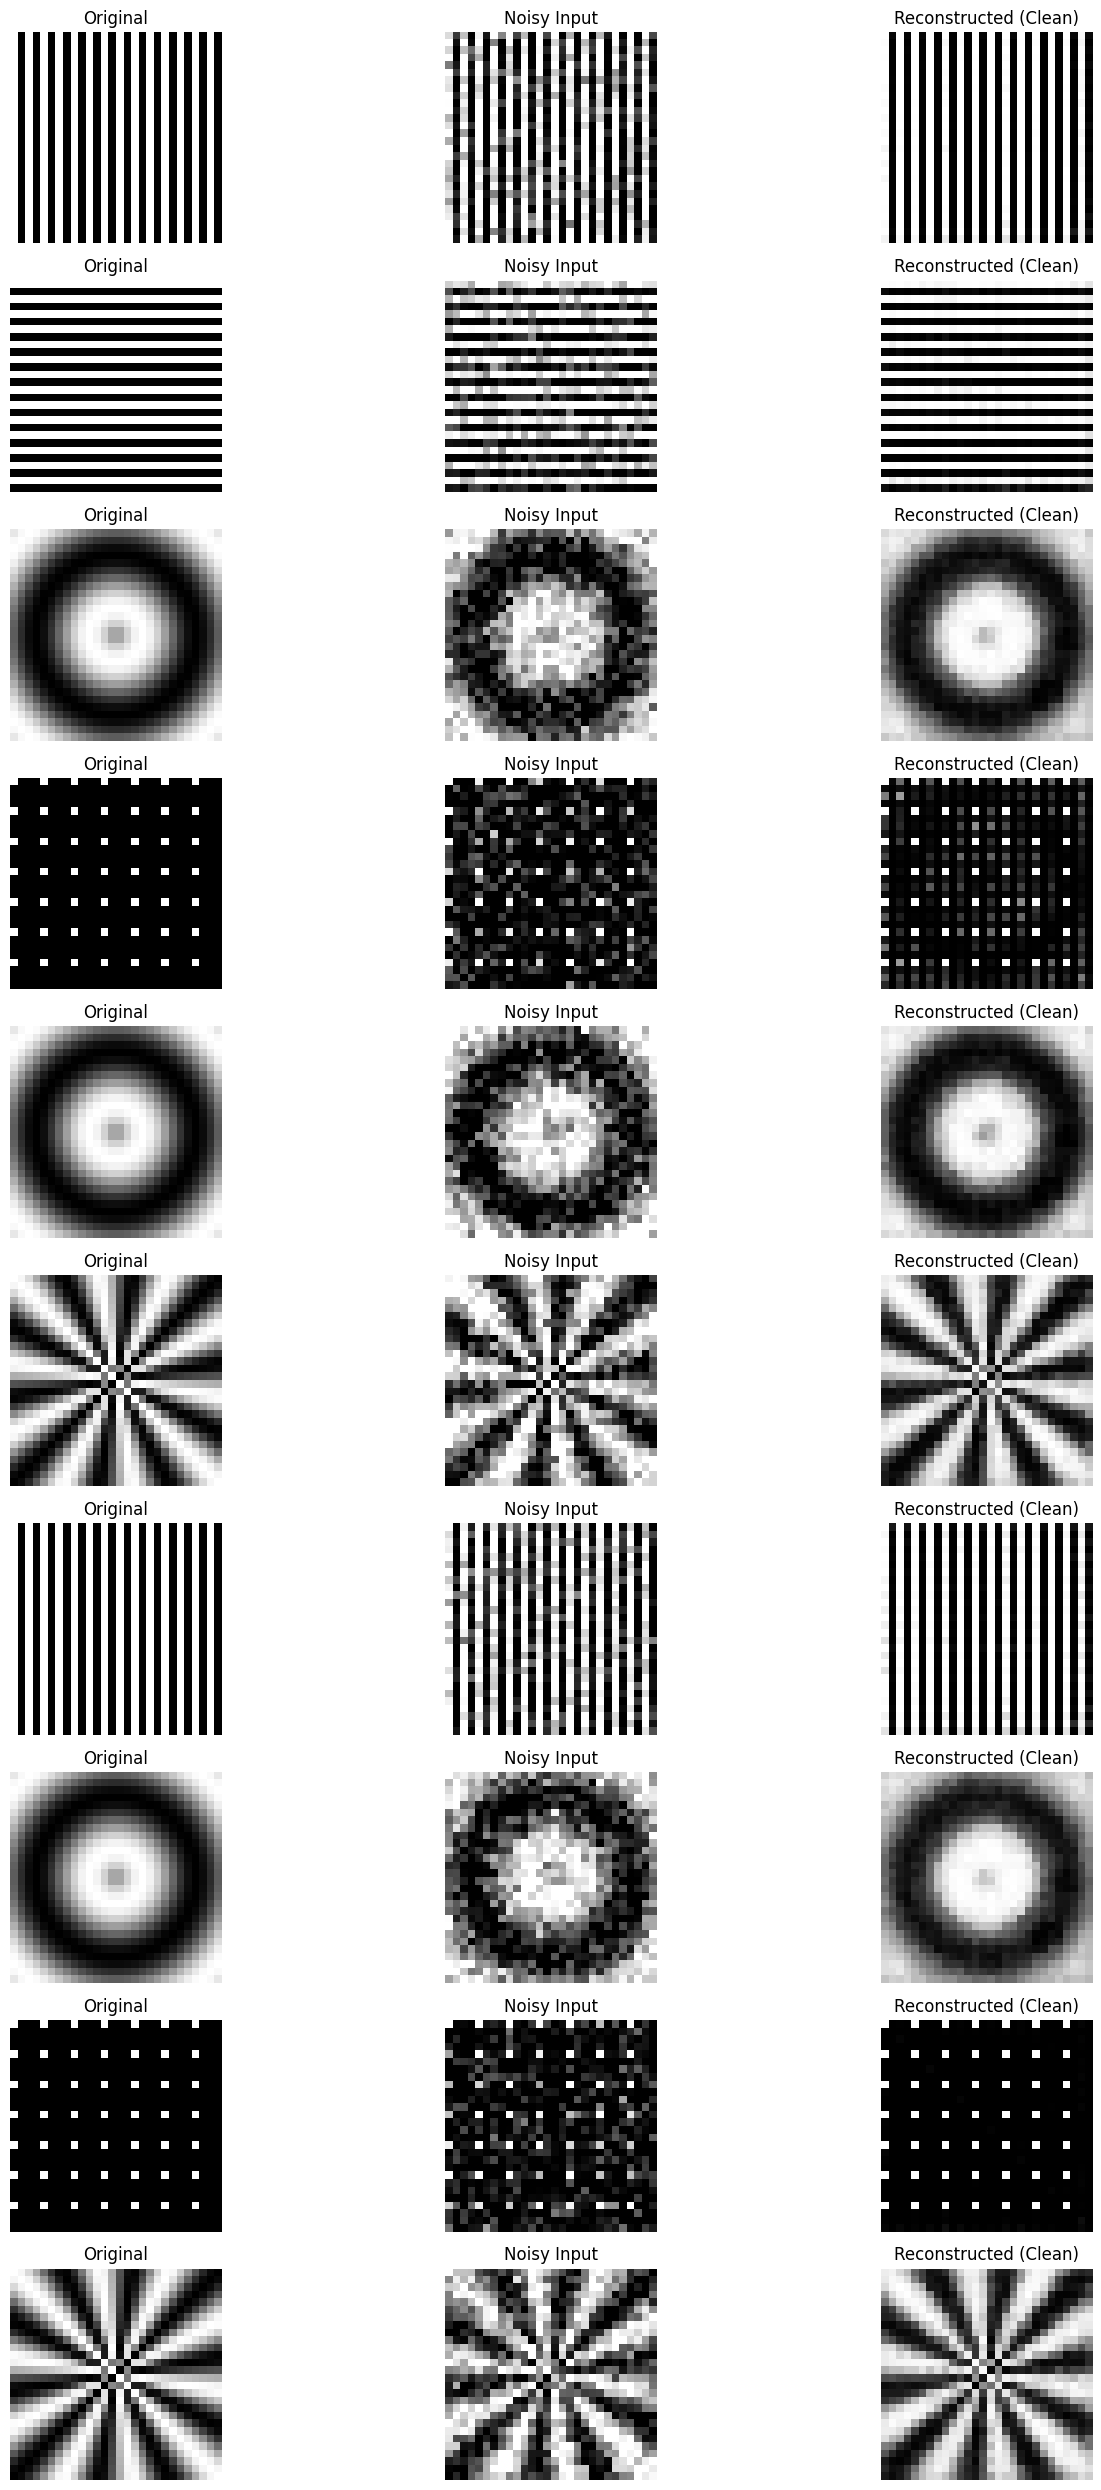

In [11]:
# Visualize noisy input and reconstructed clean images
def visualize_noisy_to_clean_reconstructions(vae, pattern_generators, num_examples=10, noise_factor=0.2):
    vae.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        fig, axes = plt.subplots(num_examples, 3, figsize=(15, num_examples * 2.5))

        for i in range(num_examples):
            # Randomly select a pattern generator
            generator = choice(list(pattern_generators.values()))
            pattern_image = generator(28)
            input_tensor = torch.tensor(pattern_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

            # Add noise to the input image
            noisy_tensor = add_noise_to_image(input_tensor, noise_factor)

            # Get the reconstruction from the VAE
            reconstructed, _, _ = vae(noisy_tensor)

            # Display original input
            axes[i, 0].imshow(pattern_image, cmap='gray')
            axes[i, 0].set_title("Original")
            axes[i, 0].axis('off')

            # Display noisy input
            axes[i, 1].imshow(noisy_tensor[0, 0].cpu().numpy(), cmap='gray')
            axes[i, 1].set_title("Noisy Input")
            axes[i, 1].axis('off')

            # Display reconstructed output (clean image)
            axes[i, 2].imshow(reconstructed[0, 0].cpu().numpy(), cmap='gray')
            axes[i, 2].set_title("Reconstructed (Clean)")
            axes[i, 2].axis('off')

        plt.tight_layout()
        plt.show()

# After training, visualize 10 examples of noisy-to-clean reconstructions
visualize_noisy_to_clean_reconstructions(vae, pattern_generators, num_examples=10, noise_factor=0.2)

In [12]:
# Block out parts of the input image (randomly mask sections)
def block_out_image(image, block_size=10):
    image = image.clone()  # Make sure to clone the image tensor
    _, _, h, w = image.shape  # Get the height and width of the image

    # Select a random position to start the block
    x_start = np.random.randint(0, h - block_size)
    y_start = np.random.randint(0, w - block_size)

    # Block out the selected region
    image[:, :, x_start:x_start+block_size, y_start:y_start+block_size] = 0  # Set the block to zeros
    return image

In [13]:
# Training loop for the VAE with blocked input
epochs = 20
batch_size = 16
block_size = 10  # The size of the block to mask out

# Instantiate the VAE and optimizer
latent_dim = 2
vae = VAE(latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=0.001)

for epoch in range(epochs):
    vae.train()
    for _ in range(100):  # Simulate batches
        batch = generate_random_pattern_batch(batch_size)  # Generate clean images
        blocked_batch = block_out_image(batch, block_size=block_size)  # Block out parts of the image

        # Forward pass: Blocked input, clean target
        reconstructed, mu, logvar = vae(blocked_batch)
        loss = vae_loss_function(reconstructed, batch, mu, logvar)  # Compare with the clean images

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print loss every 5 epochs
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [5/20], Loss: 847.8485
Epoch [10/20], Loss: 207.1953
Epoch [15/20], Loss: 179.2205
Epoch [20/20], Loss: 130.8841


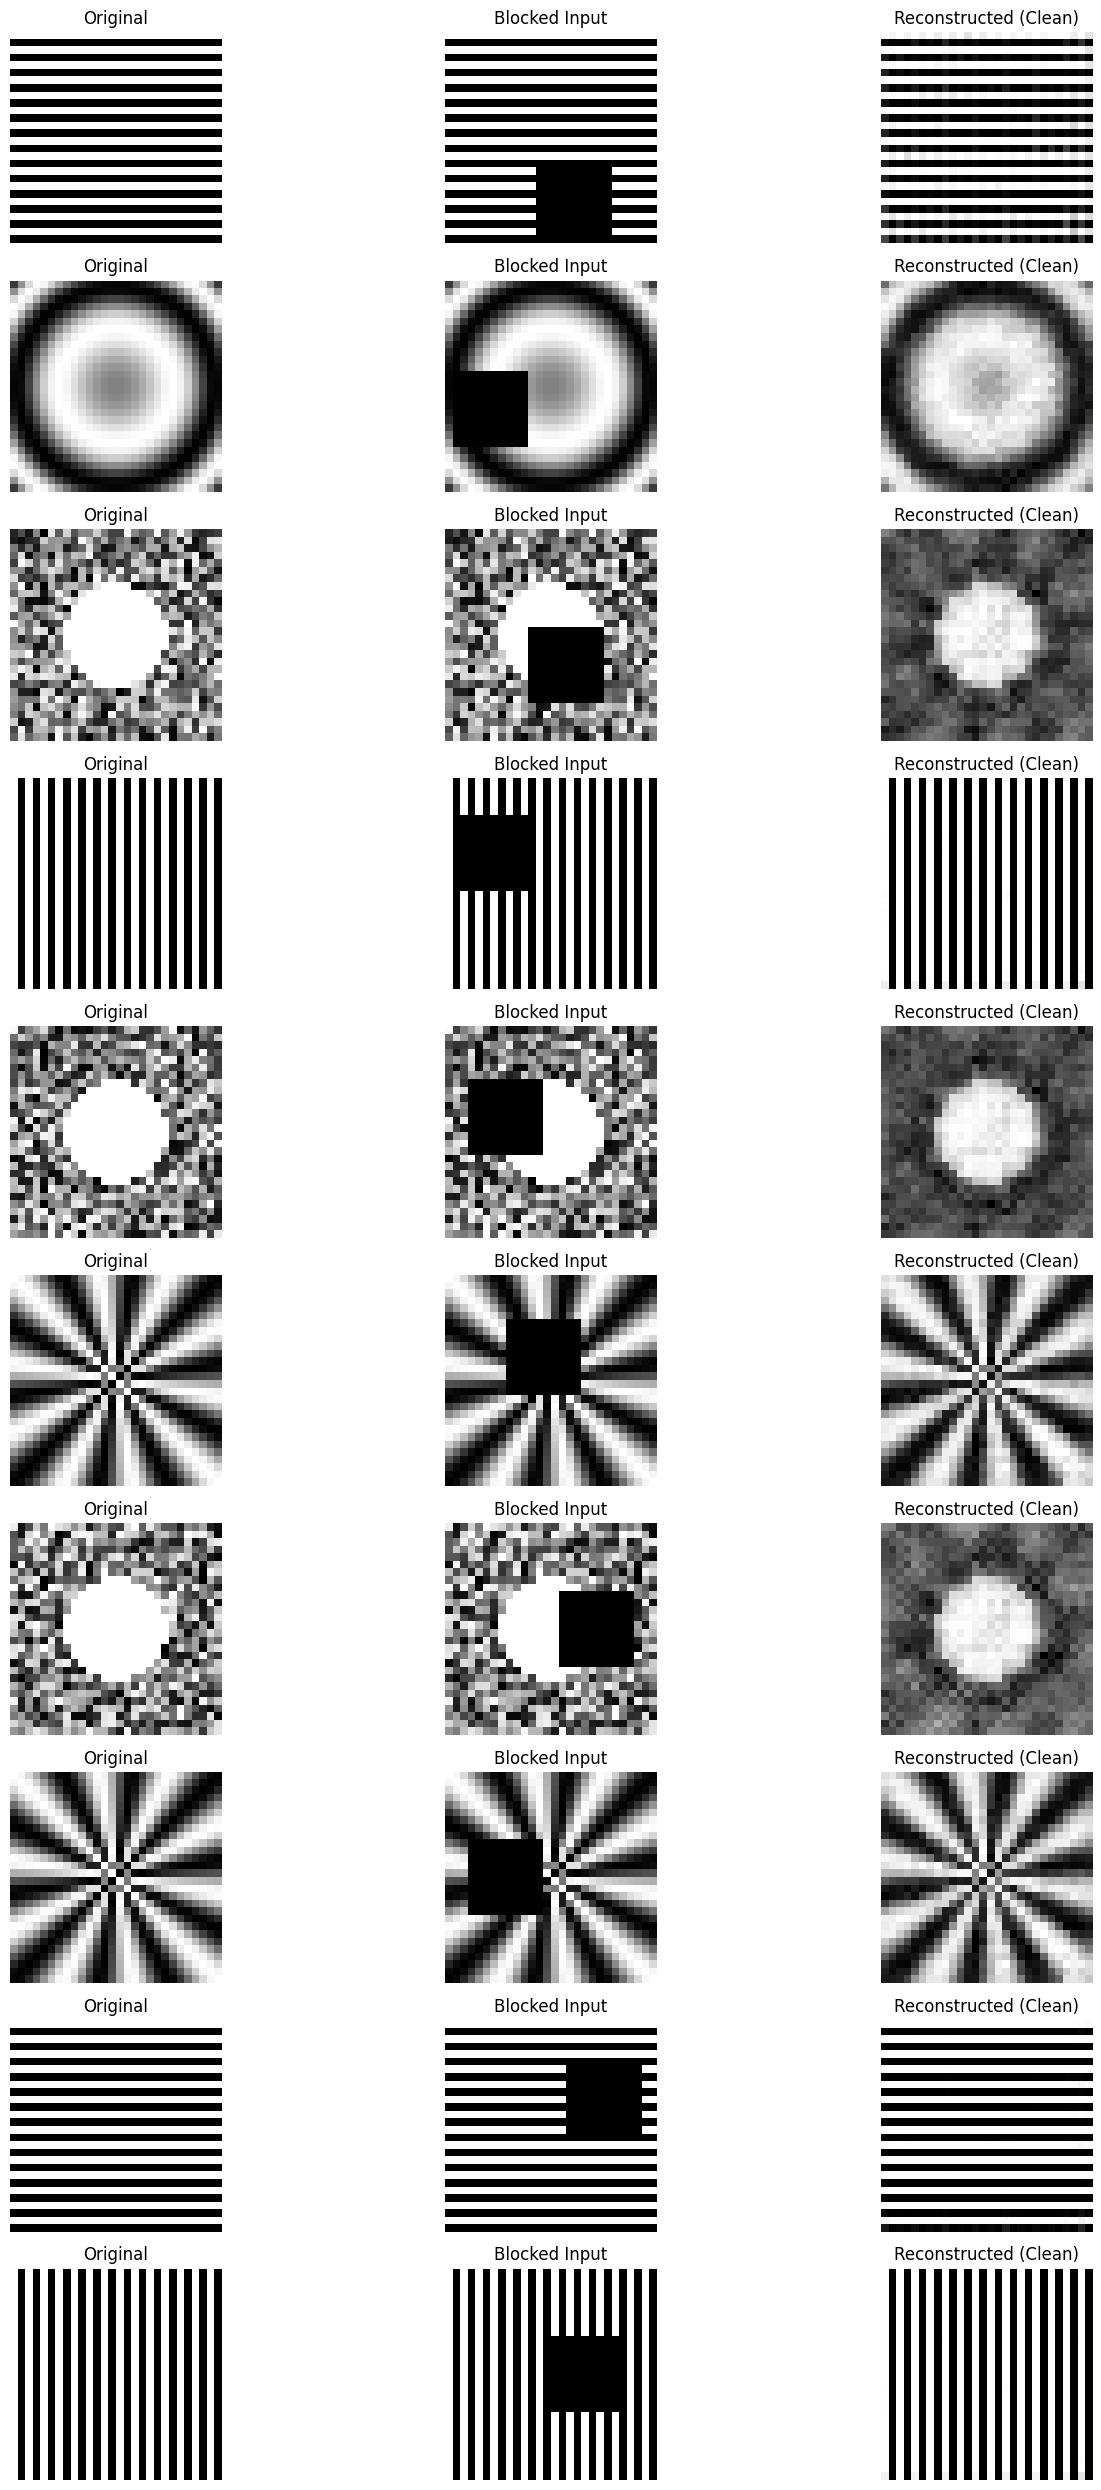

In [14]:
import matplotlib.pyplot as plt

# Visualize blocked input and reconstructed clean images
def visualize_blocked_to_clean_reconstructions(vae, pattern_generators, num_examples=10, block_size=10):
    vae.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        fig, axes = plt.subplots(num_examples, 3, figsize=(15, num_examples * 2.5))

        for i in range(num_examples):
            # Randomly select a pattern generator
            generator = choice(list(pattern_generators.values()))
            pattern_image = generator(28)
            input_tensor = torch.tensor(pattern_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

            # Block out parts of the input image
            blocked_tensor = block_out_image(input_tensor, block_size)

            # Get the reconstruction from the VAE
            reconstructed, _, _ = vae(blocked_tensor)

            # Display original input
            axes[i, 0].imshow(pattern_image, cmap='gray')
            axes[i, 0].set_title("Original")
            axes[i, 0].axis('off')

            # Display blocked input
            axes[i, 1].imshow(blocked_tensor[0, 0].cpu().numpy(), cmap='gray')
            axes[i, 1].set_title("Blocked Input")
            axes[i, 1].axis('off')

            # Display reconstructed output (clean image)
            axes[i, 2].imshow(reconstructed[0, 0].cpu().numpy(), cmap='gray')
            axes[i, 2].set_title("Reconstructed (Clean)")
            axes[i, 2].axis('off')

        plt.tight_layout()
        plt.show()

# After training, visualize 10 examples of blocked-to-clean reconstructions
visualize_blocked_to_clean_reconstructions(vae, pattern_generators, num_examples=10, block_size=10)

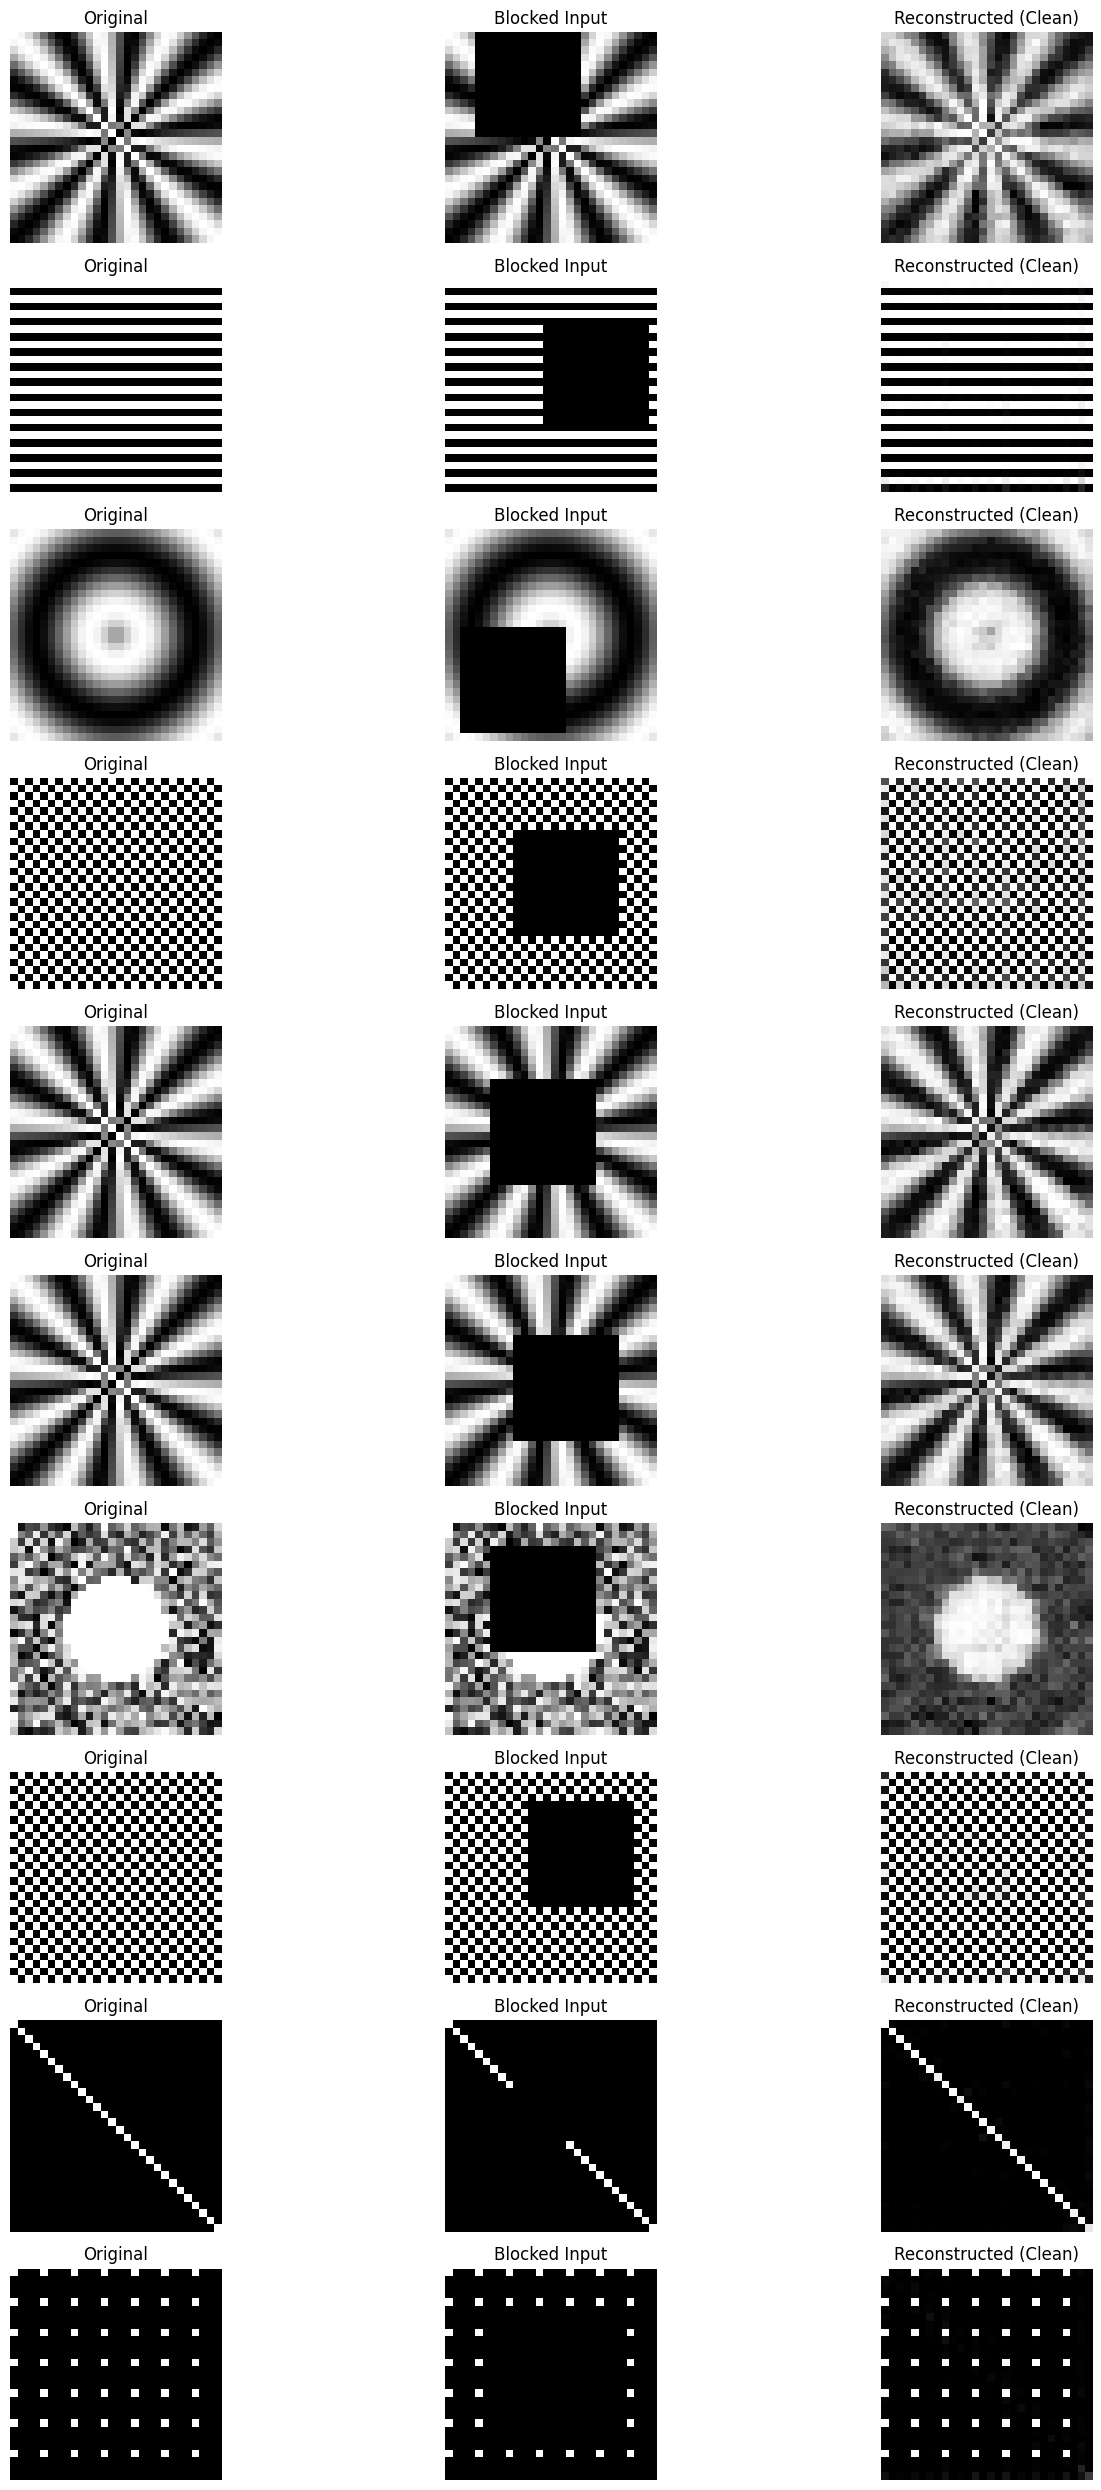

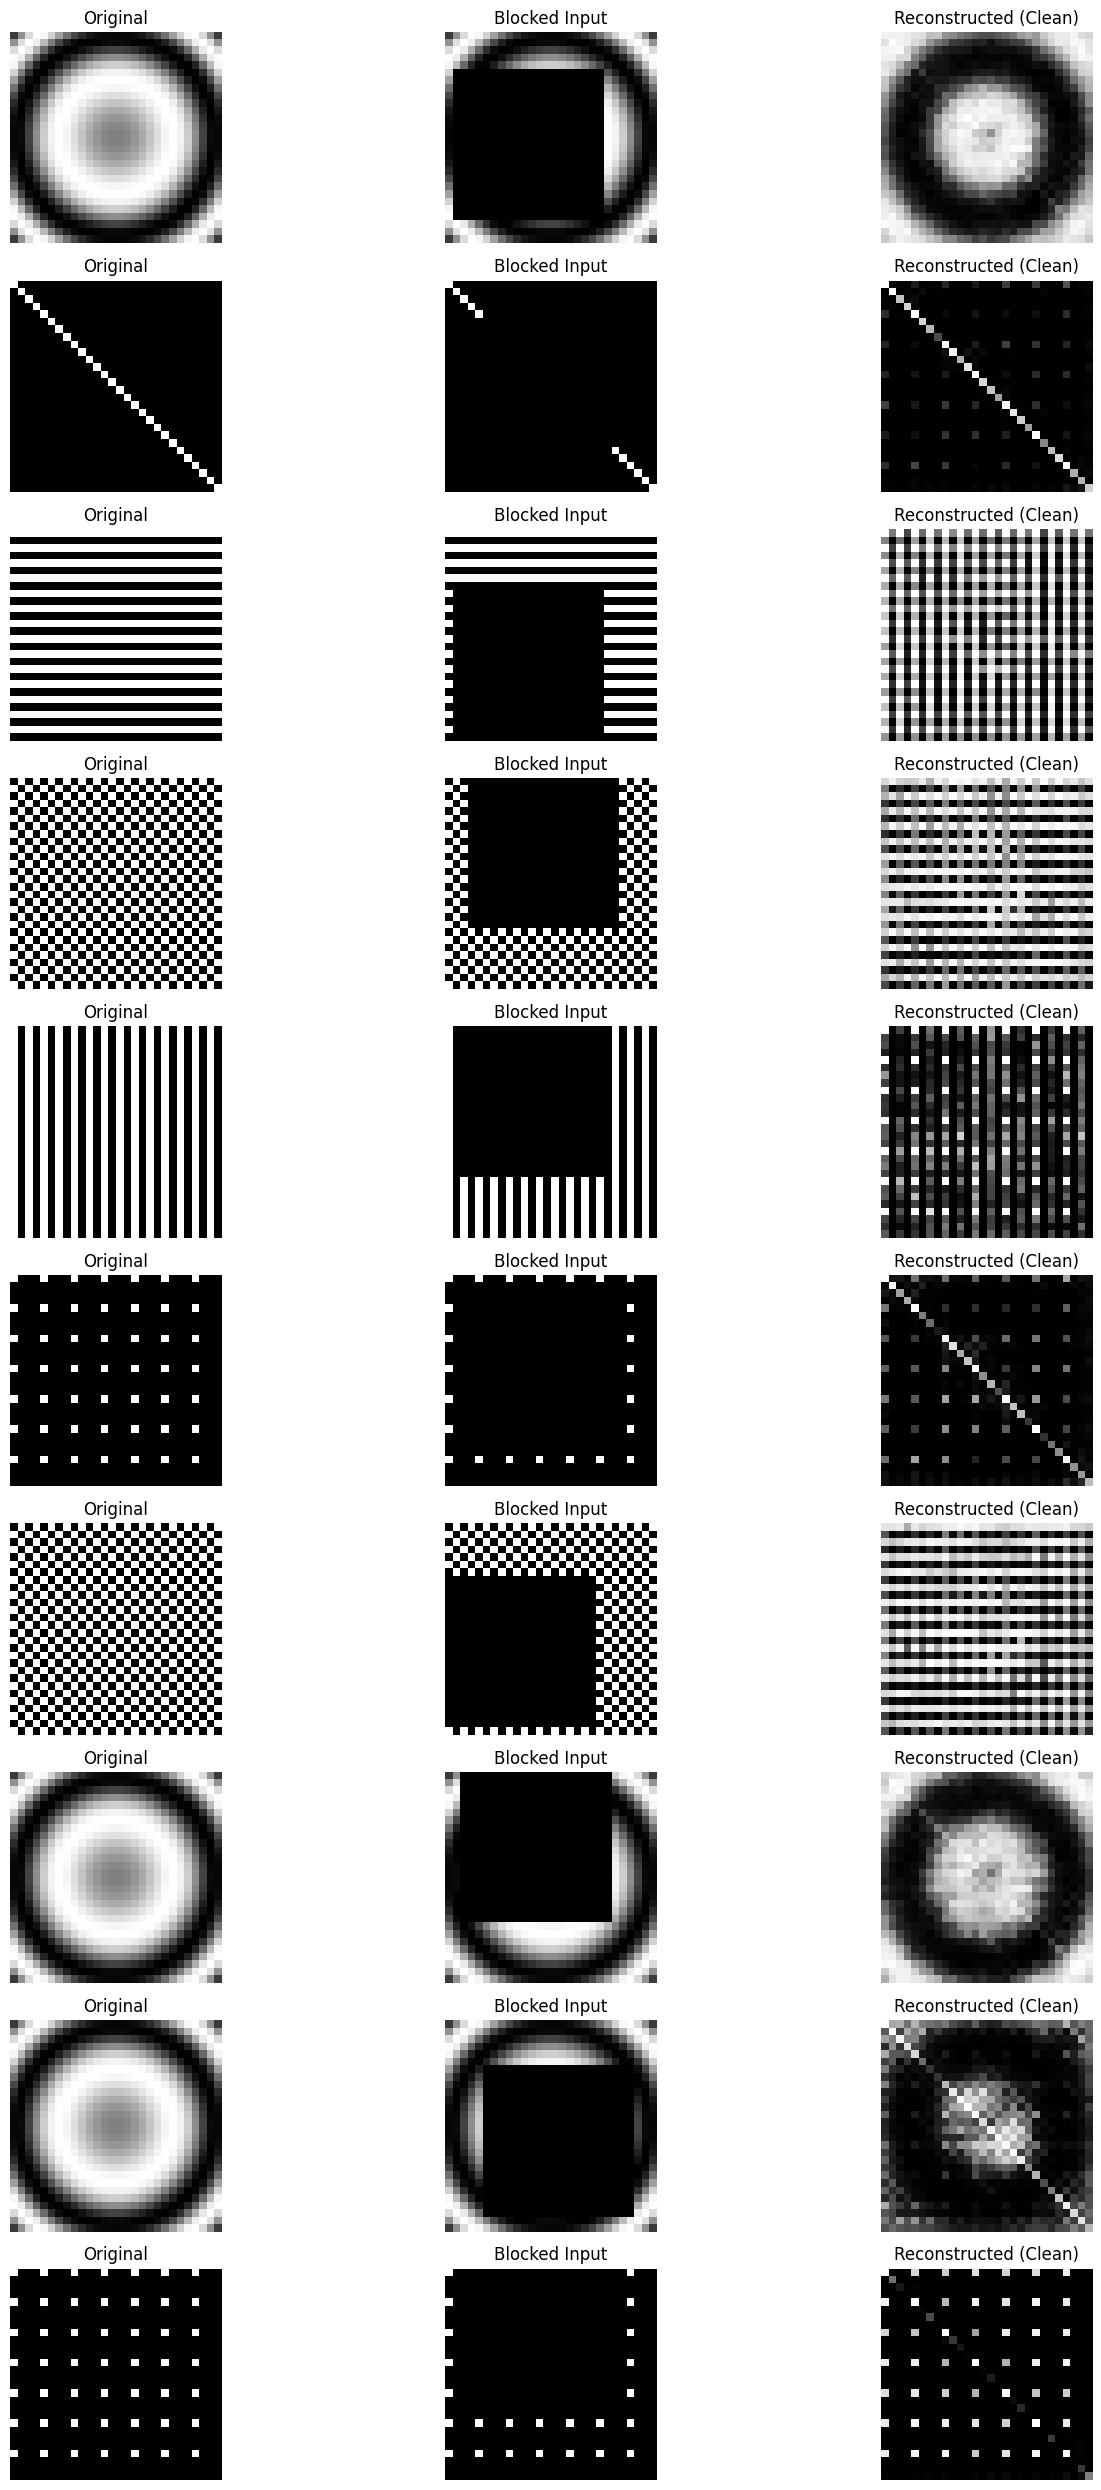

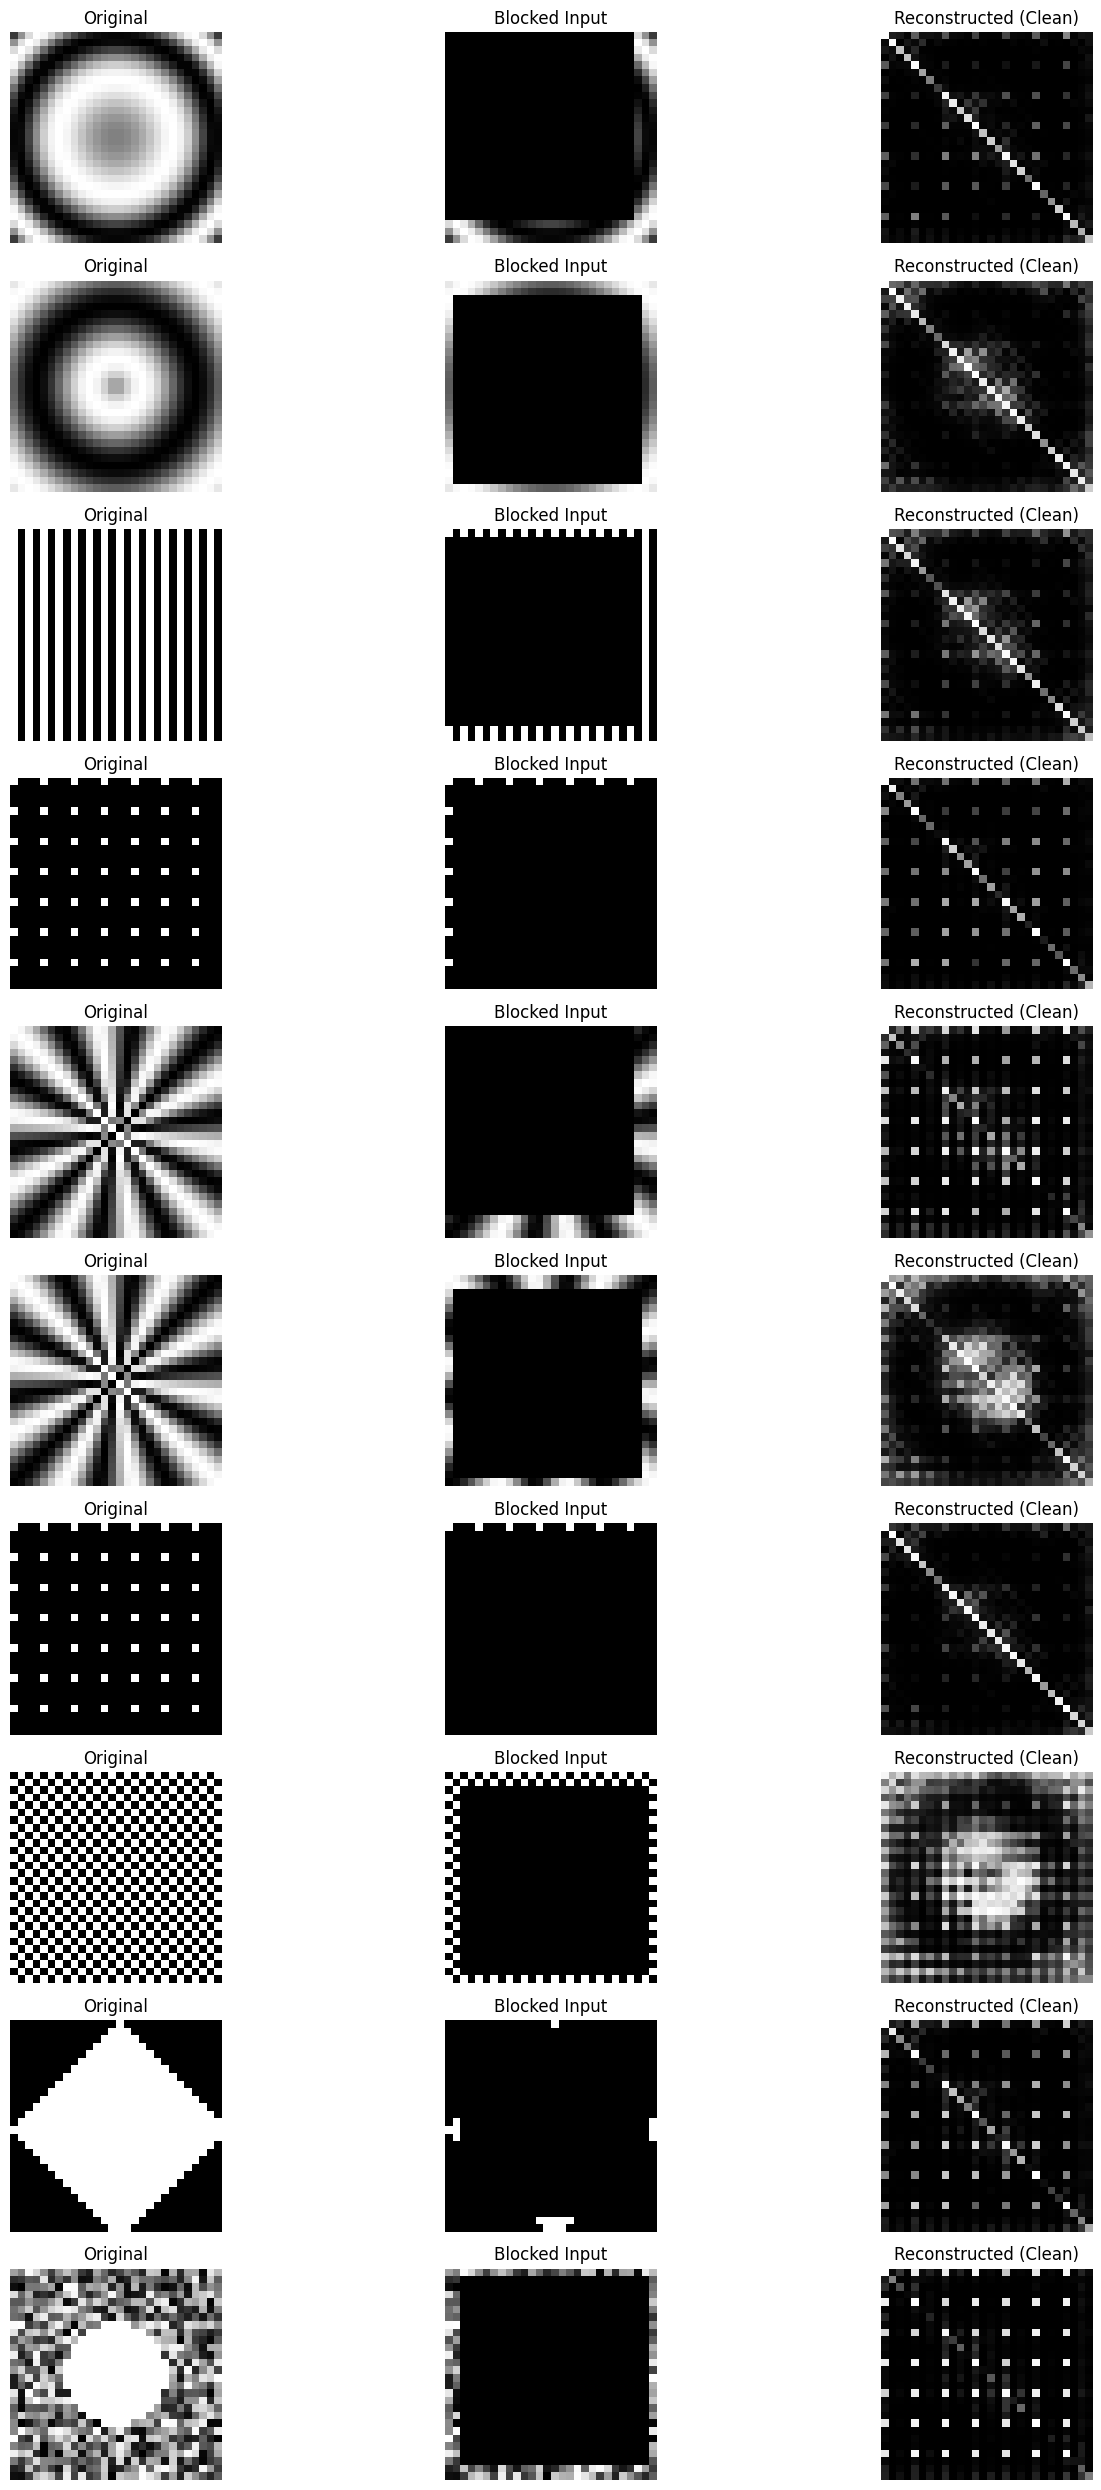

In [15]:
# Visualize for block size 14
visualize_blocked_to_clean_reconstructions(vae, pattern_generators, num_examples=10, block_size=14)

# Visualize for block size 20
visualize_blocked_to_clean_reconstructions(vae, pattern_generators, num_examples=10, block_size=20)

# Visualize for block size 25 (almost the entire image)
visualize_blocked_to_clean_reconstructions(vae, pattern_generators, num_examples=10, block_size=25)

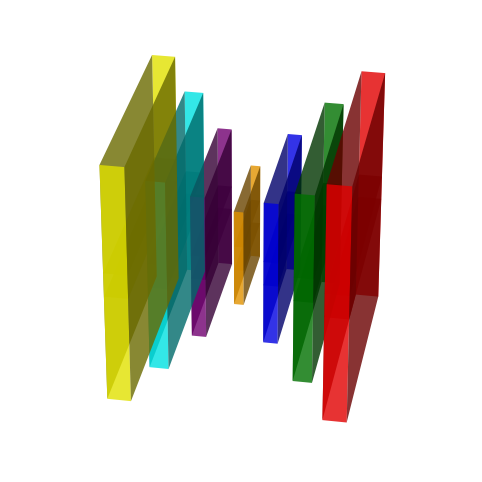

In [16]:
# Function to draw a 3D layer (block)
def draw_layer(ax, center, width, depth, color):
    r = [-width / 2, width / 2]
    X, Y = np.meshgrid(r, r)

    # Draw the 6 sides of the block
    ax.plot_surface(X + center[0], Y + center[1], np.full_like(X, center[2] + depth / 2), color=color, alpha=0.8)
    ax.plot_surface(X + center[0], Y + center[1], np.full_like(X, center[2] - depth / 2), color=color, alpha=0.8)
    ax.plot_surface(X + center[0], np.full_like(X, center[1] + width / 2), Y + center[2], color=color, alpha=0.8)
    ax.plot_surface(X + center[0], np.full_like(X, center[1] - width / 2), Y + center[2], color=color, alpha=0.8)
    ax.plot_surface(np.full_like(X, center[0] + width / 2), X + center[1], Y + center[2], color=color, alpha=0.8)
    ax.plot_surface(np.full_like(X, center[0] - width / 2), X + center[1], Y + center[2], color=color, alpha=0.8)

# Initialize the plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Parameters for layers
num_layers = 7
start_width = 10
start_depth = 1
layer_spacing = 15

colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'yellow']

# Draw the layers (starting large, shrinking, then growing again)
for i in range(num_layers):
    if i < num_layers // 2:
        width = start_width - i * 2  # Decreasing size
    else:
        width = start_width - (num_layers - i - 1) * 2  # Increasing size

    depth = start_depth
    center = (i * layer_spacing, 0, 0)  # Positioning layers
    color = colors[i % len(colors)]

    draw_layer(ax, center, width, depth, color)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(30, 100)  # Setting the view angle for visibility
ax.set_axis_off()  # Turns off the entire axis
ax.set_box_aspect([1, 1, 1])

# Show plot
plt.show()